In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk import word_tokenize
from urllib import request

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Procesar texto plano desde web

In [ ]:
url2 = 'https://www.gutenberg.org/files/2554/2554-0.txt'
response = request.urlopen(url)
raw = response.read().decode('utf8')
raw

'\ufeffThe Project Gutenberg eBook of Crime and Punishment, by Fyodor Dostoevsky\r\n\r\nThis eBook is for the use of anyone anywhere in the United States and\r\nmost other parts of the world at no cost and with almost no restrictions\r\nwhatsoever. You may copy it, give it away or re-use it under the terms\r\nof the Project Gutenberg License included with this eBook or online at\r\nwww.gutenberg.org. If you are not located in the United States, you\r\nwill have to check the laws of the country where you are located before\r\nusing this eBook.\r\n\r\nTitle: Crime and Punishment\r\n\r\nAuthor: Fyodor Dostoevsky\r\n\r\nTranslator: Constance Garnett\r\n\r\nRelease Date: March, 2001 [eBook #2554]\r\n[Most recently updated: August 6, 2021]\r\n\r\nLanguage: English\r\n\r\nCharacter set encoding: UTF-8\r\n\r\nProduced by: John Bickers, Dagny and David Widger\r\n\r\n*** START OF THE PROJECT GUTENBERG EBOOK CRIME AND PUNISHMENT ***\r\n\r\n\r\n\r\n\r\nCRIME AND PUNISHMENT\r\n\r\nBy Fyodor Dostoev

In [ ]:
len(raw)

1176812

In [ ]:
token = word_tokenize(raw)
print(token[:20])

['\ufeffThe', 'Project', 'Gutenberg', 'eBook', 'of', 'Crime', 'and', 'Punishment', ',', 'by', 'Fyodor', 'Dostoevsky', 'This', 'eBook', 'is', 'for', 'the', 'use', 'of', 'anyone']


In [ ]:
# bettering tokens with nltk
pattern = r'''(?x)                  # Flag para iniciar el modo verbose
              (?:[A-Z]\.)+          # Hace match con abreviaciones como U.S.A.
              | \w+(?:-\w+)*        # Hace match con palabras que pueden tener un guión interno
              | \$?\d+(?:\.\d+)?%?  # Hace match con dinero o porcentajes como $15.5 o 100%
              | \.\.\.              # Hace match con puntos suspensivos
              | [][;"'?():-_`]      # Hace match con signos de puntuación
'''
tokens2 = nltk.regexp_tokenize(raw, pattern)
print(tokens2[:50])

['The', 'Project', 'Gutenberg', 'eBook', 'of', 'Crime', 'and', 'Punishment', 'by', 'Fyodor', 'Dostoevsky', 'This', 'eBook', 'is', 'for', 'the', 'use', 'of', 'anyone', 'anywhere', 'in', 'the', 'United', 'States', 'and', 'most', 'other', 'parts', 'of', 'the', 'world', 'at', 'no', 'cost', 'and', 'with', 'almost', 'no', 'restrictions', 'whatsoever', 'You', 'may', 'copy', 'it', 'give', 'it', 'away', 'or', 're-use', 'it']


In [ ]:
import requests
from bs4 import BeautifulSoup
import re
from nltk.tokenize import RegexpTokenizer
url = 'https://www.gutenberg.org/files/2701/2701-h/2701-h'

In [ ]:
r = requests.get(url)

In [ ]:
html = r.text
html

'<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN"\r\n"http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd">\r\n<html xmlns="http://www.w3.org/1999/xhtml" xml:lang="en" lang="en">\r\n<head>\r\n<meta http-equiv="Content-Type" content="text/html;charset=utf-8" />\r\n<meta http-equiv="Content-Style-Type" content="text/css" />\r\n<title>The Project Gutenberg eBook of Moby Dick; Or the Whale, by Herman Melville</title>\r\n\r\n<style type="text/css" xml:space="preserve">\r\n\r\n    body {margin-left:15%; margin-right:15%; text-align:justify }\r\n    p { text-indent: 1em; margin-top: .25em; margin-bottom: .25em; }\r\n    H1,H2,H3,H4,H5,H6 { text-align: center; margin-left: 15%; margin-right: 15%; }\r\n    hr  { width: 50%; text-align: center;}\r\n    blockquote {font-size: 100%; margin-left: 0%; margin-right: 0%;}\r\n    .mynote    {background-color: #DDE; color: #000; padding: .5em; margin-left: 10%; margin-right: 10%; font-family: sans-serif; font-size: 95%;}\r\n    .toc       { margin

<!DOCTYPE html>

<html lang="en">
<head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1, user-scalable=no" name="viewport"/>
<link href="//static.platzi.com/media/favicons/platzi_favicon.png" rel="shortcut icon"/>
<title>Platzi: Cursos online profesionales de tecnología</title>
<style>@font-face{font-family:Roboto;font-style:normal;font-weight:400;font-display:swap;src:url(data:font/woff2;base64,d09GMgABAAAAAChcAA4AAAAATiAAACgFAAEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAGoFOG5JCHDYGYACCWBEMCvMI3BYLg1oAATYCJAOHMAQgBYJ0ByAb3T9FB2LYOAAgnDxBFGV79DRRVE6awf9lAidXYR0iIhKG4TiO4zgCrLSozjSWePNMaiONTIVVLDTdeWnEaYzDto8h0HO6q6fCwhEa+ySX5//z7///e60as9Y+D2JGRHJkfIVWLsegUqrlxH531w/83Hp/Y4wsQaK0CeFQZ4GFRCpGkSNzwGgRkHLERmyTFIYgg94Q2UgxQDoEPVDMuE9n76zAMCM4BYBLKirqs2A4YNMHFkwj3wWl+22owz5cVHmpgCRvCOtgKXfJgEYo3wL4f4jT7acZJE5F/P7H1UqlOBQw64T5827jXeju9SI0+Fjh/3SW7Yzh7er4X8LVOQhFh902VV6qFN3Ml3bkkawFeZ1YkjdgH3kPJS8fyT7iLtwDkHcDXggwV0yvT5uuTFsjFXUd+O/bT+3umRt8CauNYuNjJVDb+VtUjKpCqdowV2WIrBgxIFxf9
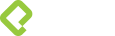
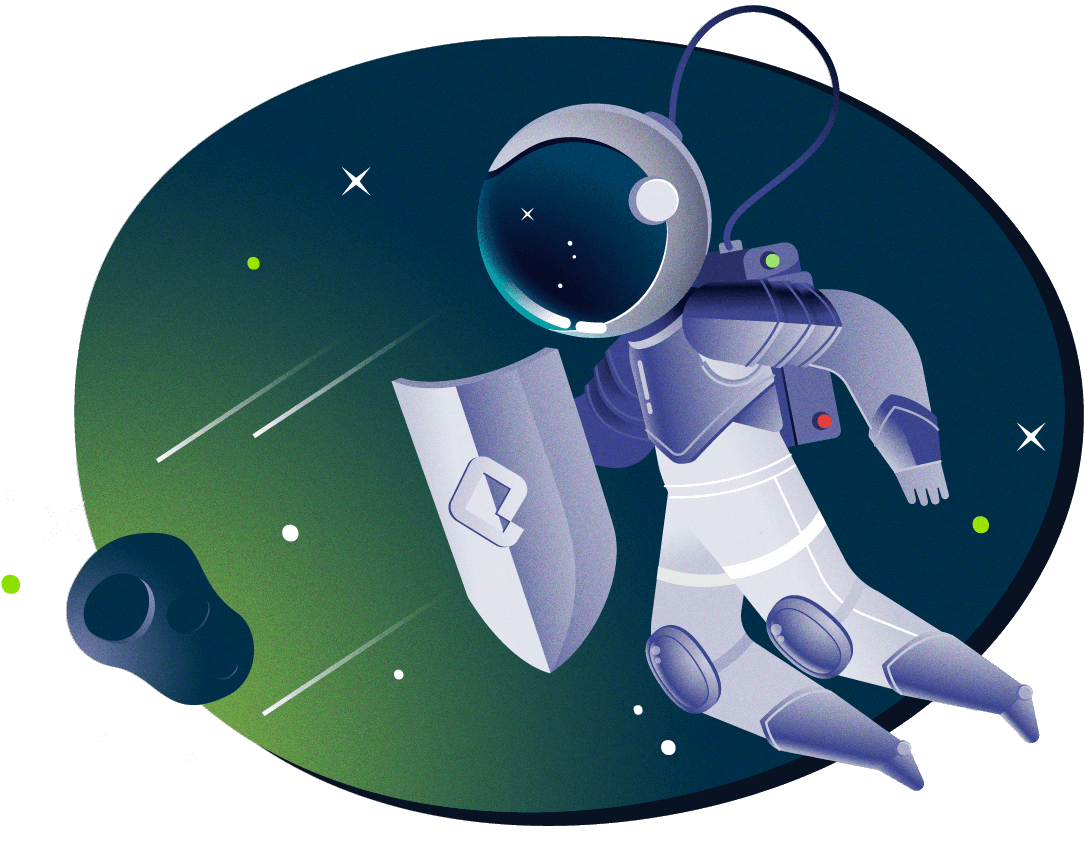

In [ ]:
soup = BeautifulSoup(html, 'html.parser')
soup